In [1]:
#pip install rarfile

In [2]:
#pip install patool

In [3]:
#pip install pyunpack

In [4]:
import rarfile
#myRarfile = rarfile.RarFile('dataset.rar')
#r = rarfile.RarFile('dataset.rar')
#r.extractall('dataset')
#r.close()

In [5]:
from pyunpack import Archive
path = r"C:\Users\USER\Desktop\NLP"
Archive("dataset.rar").extractall(path)

In [6]:
# iterating through the files in the archive  
#myRarFile = rarfile.RarFile('dataset.rar')
#for file in myRarFile.infolist():  
    # printing the filenames and file sizes  
   # print(file.filename, file.file_size)  

In [7]:
#extract_path = r'C:\Users\USER\Desktop\NLP'
#myRarFile.extractall(path = extract_path, members = myRarFile)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
lang = pd.read_csv('sentiment-analysis-on-movie-reviews/train.tsv', sep='\t')
lang2 = pd.read_csv('sentiment-analysis-on-movie-reviews/test.tsv', sep = '\t')

lang.head()

#lang2.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [9]:

sent_mapping = {
    0: "negative",
    1: "somewhat negative",
    2: "neutral",
    3: "somewhat positive",
    4: "positive"
}

lang["sent_val"] = lang["Sentiment"].map(sent_mapping)

# Print the updated DataFrame
lang.head()
lang.tail()

,PhraseId,SentenceId,Phrase,Sentiment,sent_val
156055,156056,8544,Hearst 's,2,neutral
156056,156057,8544,forced avuncular chortles,1,somewhat negative
156057,156058,8544,avuncular chortles,3,somewhat positive
156058,156059,8544,avuncular,2,neutral
156059,156060,8544,chortles,2,neutral


In [10]:
lang['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [11]:
lang.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
sent_val      0
dtype: int64

In [12]:
lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
 4   sent_val    156060 non-null  object
dtypes: int64(3), object(2)
memory usage: 6.0+ MB


Text(0, 0.5, 'counts')

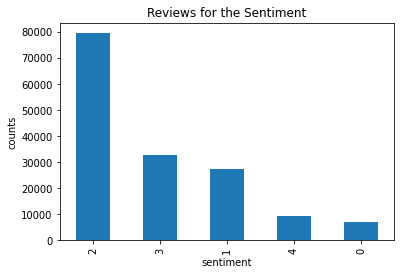

In [13]:
lang['Sentiment'].value_counts().plot(kind = 'bar')
plt.title('Reviews for the Sentiment')
plt.xlabel('sentiment')
plt.ylabel('counts')

In [14]:
lang.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [15]:
lang['Phrase'].value_counts()

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .    1
exist without the precedent of Yiddish theater , whose jolly , fun-for-fun 's - sake communal spirit goes to the essence of Broadway                                                            1
American musical comedy as we                                                                                                                                                                   1
American musical comedy                                                                                                                                                                         1
as we                                                                                                                                                                                           1
                              

In [16]:
#checking one review
lang['Phrase'].values[0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [17]:
lang.shape

(156060, 5)

In [18]:
len(lang['Phrase'])

156060

In [19]:
lang['Phrase'][45678]

'vibrant , and intelligent'

In [20]:
lang = lang[lang['Phrase'].apply(lambda x: len(str(x).split())) >= 5]

# Optional: Resetting the index of the filtered dataset
lang = lang.reset_index(drop=True)

# Printing the resulting dataset
print(lang)

       PhraseId  SentenceId  \
0             1           1   
1             2           1   
2             6           1   
3             8           1   
4            10           1   
...         ...         ...   
78285    156048        8544   
78286    156049        8544   
78287    156050        8544   
78288    156054        8544   
78289    156055        8544   

                                                  Phrase  Sentiment  \
0      A series of escapades demonstrating the adage ...          1   
1      A series of escapades demonstrating the adage ...          2   
2      of escapades demonstrating the adage that what...          2   
3      escapades demonstrating the adage that what is...          2   
4      demonstrating the adage that what is good for ...          2   
...                                                  ...        ...   
78285  quietly suggesting the sadness and obsession b...          1   
78286  suggesting the sadness and obsession beneath H...   

In [21]:
lang.head(20)

,PhraseId,SentenceId,Phrase,Sentiment,sent_val
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative
1,2,1,A series of escapades demonstrating the adage ...,2,neutral
2,6,1,of escapades demonstrating the adage that what...,2,neutral
3,8,1,escapades demonstrating the adage that what is...,2,neutral
4,10,1,demonstrating the adage that what is good for ...,2,neutral
5,16,1,that what is good for the goose,2,neutral
6,18,1,what is good for the goose,2,neutral
7,20,1,is good for the goose,2,neutral
8,28,1,"is also good for the gander , some of which oc...",2,neutral
9,29,1,"is also good for the gander , some of which oc...",2,neutral


In [22]:
lang.shape

(78290, 5)

In [23]:
#Word count - checking how many words in the review
#lang['word_count'] = lang['Phrase'].apply(lambda x: len(x.split())) 
#lang_filtered = lang[lang['word_count'] > 5].copy()                  
#lang_filtered.reset_index(drop=True, inplace=True)
#lang.head()

In [24]:
lang

,PhraseId,SentenceId,Phrase,Sentiment,sent_val
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative
1,2,1,A series of escapades demonstrating the adage ...,2,neutral
2,6,1,of escapades demonstrating the adage that what...,2,neutral
3,8,1,escapades demonstrating the adage that what is...,2,neutral
4,10,1,demonstrating the adage that what is good for ...,2,neutral
...,...,...,...,...,...
78285,156048,8544,quietly suggesting the sadness and obsession b...,1,somewhat negative
78286,156049,8544,suggesting the sadness and obsession beneath H...,2,neutral
78287,156050,8544,suggesting the sadness and obsession,2,neutral
78288,156054,8544,beneath Hearst 's forced avuncular chortles,2,neutral


In [25]:
#This is to check our for character_count....
#number of character in each review
lang['char_count']  = lang['Phrase'].apply(lambda x: len(x))
lang.head()

,PhraseId,SentenceId,Phrase,Sentiment,sent_val,char_count
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative,188
1,2,1,A series of escapades demonstrating the adage ...,2,neutral,77
2,6,1,of escapades demonstrating the adage that what...,2,neutral,68
3,8,1,escapades demonstrating the adage that what is...,2,neutral,65
4,10,1,demonstrating the adage that what is good for ...,2,neutral,55


In [26]:
#the lambda function average_word_length splits each text into individual words using the split() method,
#calculates the length of each word using len(), and then computes the average by dividing the sum of word lengths by the total
#number of words. The apply() function is used to apply this lambda function to each row in the "phrase" column,



average_word_length = lambda text: sum(len(word) for word in text.split()) / len(text.split()) if len(text.split()) > 0 else 0

# Apply the lambda function to each row in the "phrase" column and store the results in a new column "avg_word_length"
lang['avg_word_length'] = lang['Phrase'].apply(average_word_length)
lang.head()

#The ZeroDivisionError occurs when a text contains no words. To handle this error, 
#you can add a condition to check if the text is empty or not before performing the division.

,PhraseId,SentenceId,Phrase,Sentiment,sent_val,char_count,avg_word_length
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative,188,4.108108
1,2,1,A series of escapades demonstrating the adage ...,2,neutral,77,4.571429
2,6,1,of escapades demonstrating the adage that what...,2,neutral,68,4.750000
3,8,1,escapades demonstrating the adage that what is...,2,neutral,65,5.000000
4,10,1,demonstrating the adage that what is good for ...,2,neutral,55,4.600000


In [27]:
#stop_words = nltk.download('stopwords')
stop_words = stopwords.words('english')
#stop_words
len(stop_words)


179

In [28]:
#Calculating the metrics of the number of stopwords in each phrase
lang['stopword_count'] = lang['Phrase'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))
lang.head()

,PhraseId,SentenceId,Phrase,Sentiment,sent_val,char_count,avg_word_length,stopword_count
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative,188,4.108108,20
1,2,1,A series of escapades demonstrating the adage ...,2,neutral,77,4.571429,8
2,6,1,of escapades demonstrating the adage that what...,2,neutral,68,4.750000,7
3,8,1,escapades demonstrating the adage that what is...,2,neutral,65,5.000000,6
4,10,1,demonstrating the adage that what is good for ...,2,neutral,55,4.600000,6


In [29]:
#lang['stopword_rate'] = lang['stopword_count'] / lang['word count']
#lang.head()

In [30]:
#lang.sort_values(by = 'stopword_rate')


In [31]:
lang.describe()

,PhraseId,SentenceId,Sentiment,char_count,avg_word_length,stopword_count
count,78290.000000,78290.000000,78290.000000,78290.000000,78290.000000,78290.000000
mean,81651.845306,4278.256968,2.052855,65.347784,4.614375,4.671325
std,44235.153919,2464.637678,1.044791,39.845553,0.937255,3.300715
min,1.000000,1.000000,0.000000,12.000000,1.500000,0.000000
25%,44309.250000,2148.000000,1.000000,36.000000,4.000000,2.000000
50%,82952.000000,4283.000000,2.000000,53.000000,4.521739,4.000000
75%,119906.750000,6413.000000,3.000000,84.000000,5.157895,6.000000
max,156055.000000,8544.000000,4.000000,283.000000,10.800000,27.000000


In [32]:
lang.corr()

,PhraseId,SentenceId,Sentiment,char_count,avg_word_length,stopword_count
PhraseId,1.000000,0.999602,-0.009177,-0.004750,-0.011162,-0.000180
SentenceId,0.999602,1.000000,-0.009284,-0.004277,-0.010814,0.000270
Sentiment,-0.009177,-0.009284,1.000000,-0.001948,0.058660,-0.038809
char_count,-0.004750,-0.004277,-0.001948,1.000000,0.101946,0.823072
avg_word_length,-0.011162,-0.010814,0.058660,0.101946,1.000000,-0.238510
stopword_count,-0.000180,0.000270,-0.038809,0.823072,-0.238510,1.000000


### DAta Cleaning

In [33]:
lang['Phrase']

0        A series of escapades demonstrating the adage ...
1        A series of escapades demonstrating the adage ...
2        of escapades demonstrating the adage that what...
3        escapades demonstrating the adage that what is...
4        demonstrating the adage that what is good for ...
                               ...                        
78285    quietly suggesting the sadness and obsession b...
78286    suggesting the sadness and obsession beneath H...
78287                 suggesting the sadness and obsession
78288          beneath Hearst 's forced avuncular chortles
78289                  Hearst 's forced avuncular chortles
Name: Phrase, Length: 78290, dtype: object

In [34]:
#changing uppercase texts to lowercase
lang['lower_case'] = lang['Phrase'].apply(lambda x: " ".join(word.lower()for word in x.split()))
lang.head(20)

,PhraseId,SentenceId,Phrase,Sentiment,sent_val,char_count,avg_word_length,stopword_count,lower_case
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative,188,4.108108,20,a series of escapades demonstrating the adage ...
1,2,1,A series of escapades demonstrating the adage ...,2,neutral,77,4.571429,8,a series of escapades demonstrating the adage ...
2,6,1,of escapades demonstrating the adage that what...,2,neutral,68,4.750000,7,of escapades demonstrating the adage that what...
3,8,1,escapades demonstrating the adage that what is...,2,neutral,65,5.000000,6,escapades demonstrating the adage that what is...
4,10,1,demonstrating the adage that what is good for ...,2,neutral,55,4.600000,6,demonstrating the adage that what is good for ...
5,16,1,that what is good for the goose,2,neutral,31,3.571429,5,that what is good for the goose
6,18,1,what is good for the goose,2,neutral,26,3.500000,4,what is good for the goose
7,20,1,is good for the goose,2,neutral,21,3.400000,3,is good for the goose
8,28,1,"is also good for the gander , some of which oc...",2,neutral,110,3.826087,12,"is also good for the gander , some of which oc..."
9,29,1,"is also good for the gander , some of which oc...",2,neutral,108,3.954545,12,"is also good for the gander , some of which oc..."


In [35]:
#Removing the punctuations
lang['punctuation']= lang['lower_case'].str.replace('[^\w\s]', '')
lang.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_2260\3503431186.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  lang['punctuation']= lang['lower_case'].str.replace('[^\w\s]', '')


,PhraseId,SentenceId,Phrase,Sentiment,sent_val,char_count,avg_word_length,stopword_count,lower_case,punctuation
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative,188,4.108108,20,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...
1,2,1,A series of escapades demonstrating the adage ...,2,neutral,77,4.571429,8,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...
2,6,1,of escapades demonstrating the adage that what...,2,neutral,68,4.750000,7,of escapades demonstrating the adage that what...,of escapades demonstrating the adage that what...
3,8,1,escapades demonstrating the adage that what is...,2,neutral,65,5.000000,6,escapades demonstrating the adage that what is...,escapades demonstrating the adage that what is...
4,10,1,demonstrating the adage that what is good for ...,2,neutral,55,4.600000,6,demonstrating the adage that what is good for ...,demonstrating the adage that what is good for ...


In [36]:
lang['stopwords'] = lang['punctuation'].apply(lambda x: ' '.join(word for word in x.split()if word not in stop_words))
lang.head()

,PhraseId,SentenceId,Phrase,Sentiment,sent_val,char_count,avg_word_length,stopword_count,lower_case,punctuation,stopwords
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative,188,4.108108,20,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...,series escapades demonstrating adage good goos...
1,2,1,A series of escapades demonstrating the adage ...,2,neutral,77,4.571429,8,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...,series escapades demonstrating adage good goose
2,6,1,of escapades demonstrating the adage that what...,2,neutral,68,4.750000,7,of escapades demonstrating the adage that what...,of escapades demonstrating the adage that what...,escapades demonstrating adage good goose
3,8,1,escapades demonstrating the adage that what is...,2,neutral,65,5.000000,6,escapades demonstrating the adage that what is...,escapades demonstrating the adage that what is...,escapades demonstrating adage good goose
4,10,1,demonstrating the adage that what is good for ...,2,neutral,55,4.600000,6,demonstrating the adage that what is good for ...,demonstrating the adage that what is good for ...,demonstrating adage good goose


In [37]:
cloud = " ".join(lang['stopwords']).split()
cloud

['series',
 'escapades',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'also',
 'good',
 'gander',
 'occasionally',
 'amuses',
 'none',
 'amounts',
 'much',
 'story',
 'series',
 'escapades',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'escapades',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'escapades',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'good',
 'goose',
 'good',
 'goose',
 'good',
 'goose',
 'also',
 'good',
 'gander',
 'occasionally',
 'amuses',
 'none',
 'amounts',
 'much',
 'story',
 'also',
 'good',
 'gander',
 'occasionally',
 'amuses',
 'none',
 'amounts',
 'much',
 'story',
 'good',
 'gander',
 'occasionally',
 'amuses',
 'none',
 'amounts',
 'much',
 'story',
 'gander',
 'occasionally',
 'amuses',
 'none',
 'amounts',
 'much',
 'story',
 'gander',
 'occasionally',
 'amuses',
 'none',
 'amounts',
 'much',
 'story',
 'occasionally',
 'amuses',
 'none',
 'amounts',
 'much',
 'story',
 'occasionally',
 'amuses

In [38]:
pd.Series(" ".join(lang['stopwords']).split()).value_counts()[:20]

film          5602
movie         4897
nt            3702
one           3148
like          2743
story         2064
rrb           2048
lrb           1894
good          1611
characters    1596
much          1575
time          1488
even          1445
comedy        1295
way           1273
make          1266
life          1248
little        1248
funny         1193
movies        1093
dtype: int64

### Lemmatization

In [39]:
#from textblob import download_corpora

#download_corpora.main()


In [40]:
from textblob import Word
lang['lemmatize'] = lang['stopwords'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))
lang.head()

,PhraseId,SentenceId,Phrase,Sentiment,sent_val,char_count,avg_word_length,stopword_count,lower_case,punctuation,stopwords,lemmatize
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative,188,4.108108,20,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...,series escapades demonstrating adage good goos...,series escapade demonstrating adage good goose...
1,2,1,A series of escapades demonstrating the adage ...,2,neutral,77,4.571429,8,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...,series escapades demonstrating adage good goose,series escapade demonstrating adage good goose
2,6,1,of escapades demonstrating the adage that what...,2,neutral,68,4.750000,7,of escapades demonstrating the adage that what...,of escapades demonstrating the adage that what...,escapades demonstrating adage good goose,escapade demonstrating adage good goose
3,8,1,escapades demonstrating the adage that what is...,2,neutral,65,5.000000,6,escapades demonstrating the adage that what is...,escapades demonstrating the adage that what is...,escapades demonstrating adage good goose,escapade demonstrating adage good goose
4,10,1,demonstrating the adage that what is good for ...,2,neutral,55,4.600000,6,demonstrating the adage that what is good for ...,demonstrating the adage that what is good for ...,demonstrating adage good goose,demonstrating adage good goose


In [41]:
lang['lemmatize']

0        series escapade demonstrating adage good goose...
1           series escapade demonstrating adage good goose
2                  escapade demonstrating adage good goose
3                  escapade demonstrating adage good goose
4                           demonstrating adage good goose
                               ...                        
78285    quietly suggesting sadness obsession beneath h...
78286    suggesting sadness obsession beneath hearst fo...
78287                         suggesting sadness obsession
78288              beneath hearst forced avuncular chortle
78289                      hearst forced avuncular chortle
Name: lemmatize, Length: 78290, dtype: object

In [42]:
#pip install wordcloud

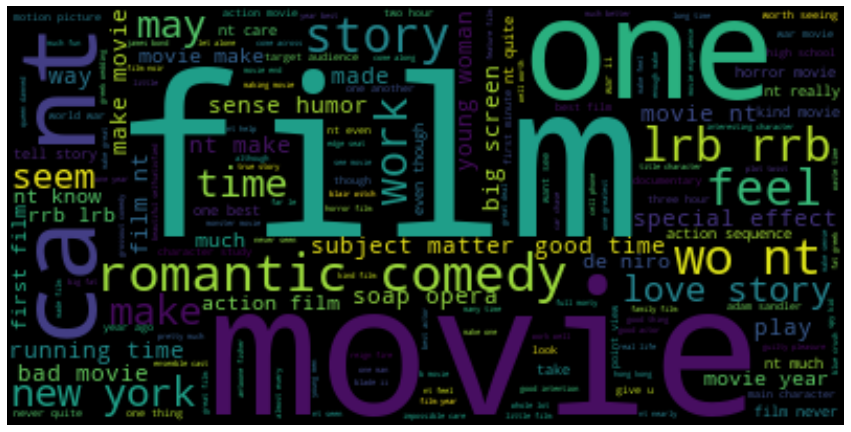

In [43]:
from wordcloud import WordCloud,  STOPWORDS, ImageColorGenerator
# Generate wordcloud data
text = " ".join(i for i in lang.lemmatize)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords,
                      background_color="black").generate(text)

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [44]:
lang['sent_val'][:100]

0     somewhat negative
1               neutral
2               neutral
3               neutral
4               neutral
            ...        
95             negative
96              neutral
97              neutral
98              neutral
99              neutral
Name: sent_val, Length: 100, dtype: object

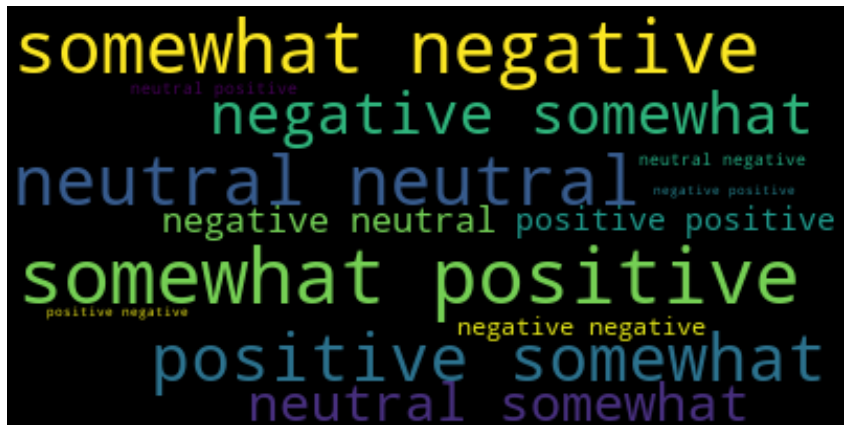

In [45]:
text = " ".join(i for i in lang.sent_val)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords,
                      background_color="black").generate(text)

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [46]:
lang.head()

,PhraseId,SentenceId,Phrase,Sentiment,sent_val,char_count,avg_word_length,stopword_count,lower_case,punctuation,stopwords,lemmatize
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative,188,4.108108,20,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...,series escapades demonstrating adage good goos...,series escapade demonstrating adage good goose...
1,2,1,A series of escapades demonstrating the adage ...,2,neutral,77,4.571429,8,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...,series escapades demonstrating adage good goose,series escapade demonstrating adage good goose
2,6,1,of escapades demonstrating the adage that what...,2,neutral,68,4.750000,7,of escapades demonstrating the adage that what...,of escapades demonstrating the adage that what...,escapades demonstrating adage good goose,escapade demonstrating adage good goose
3,8,1,escapades demonstrating the adage that what is...,2,neutral,65,5.000000,6,escapades demonstrating the adage that what is...,escapades demonstrating the adage that what is...,escapades demonstrating adage good goose,escapade demonstrating adage good goose
4,10,1,demonstrating the adage that what is good for ...,2,neutral,55,4.600000,6,demonstrating the adage that what is good for ...,demonstrating the adage that what is good for ...,demonstrating adage good goose,demonstrating adage good goose


In [47]:
lang.shape

(78290, 12)

In [48]:
lang.to_csv('lang.tsv', sep = '\t')

In [49]:
pd.read_csv('lang.tsv', sep = '\t')

,Unnamed: 0,PhraseId,SentenceId,Phrase,Sentiment,sent_val,char_count,avg_word_length,stopword_count,lower_case,punctuation,stopwords,lemmatize
0,0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative,188,4.108108,20,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...,series escapades demonstrating adage good goos...,series escapade demonstrating adage good goose...
1,1,2,1,A series of escapades demonstrating the adage ...,2,neutral,77,4.571429,8,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...,series escapades demonstrating adage good goose,series escapade demonstrating adage good goose
2,2,6,1,of escapades demonstrating the adage that what...,2,neutral,68,4.750000,7,of escapades demonstrating the adage that what...,of escapades demonstrating the adage that what...,escapades demonstrating adage good goose,escapade demonstrating adage good goose
3,3,8,1,escapades demonstrating the adage that what is...,2,neutral,65,5.000000,6,escapades demonstrating the adage that what is...,escapades demonstrating the adage that what is...,escapades demonstrating adage good goose,escapade demonstrating adage good goose
4,4,10,1,demonstrating the adage that what is good for ...,2,neutral,55,4.600000,6,demonstrating the adage that what is good for ...,demonstrating the adage that what is good for ...,demonstrating adage good goose,demonstrating adage good goose
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78285,78285,156048,8544,quietly suggesting the sadness and obsession b...,1,somewhat negative,88,6.416667,2,quietly suggesting the sadness and obsession b...,quietly suggesting the sadness and obsession b...,quietly suggesting sadness obsession beneath h...,quietly suggesting sadness obsession beneath h...
78286,78286,156049,8544,suggesting the sadness and obsession beneath H...,2,neutral,80,6.363636,2,suggesting the sadness and obsession beneath h...,suggesting the sadness and obsession beneath h...,suggesting sadness obsession beneath hearst fo...,suggesting sadness obsession beneath hearst fo...
78287,78287,156050,8544,suggesting the sadness and obsession,2,neutral,36,6.400000,2,suggesting the sadness and obsession,suggesting the sadness and obsession,suggesting sadness obsession,suggesting sadness obsession
78288,78288,156054,8544,beneath Hearst 's forced avuncular chortles,2,neutral,43,6.333333,0,beneath hearst 's forced avuncular chortles,beneath hearst s forced avuncular chortles,beneath hearst forced avuncular chortles,beneath hearst forced avuncular chortle


In [50]:
lang.isnull().sum()

PhraseId           0
SentenceId         0
Phrase             0
Sentiment          0
sent_val           0
char_count         0
avg_word_length    0
stopword_count     0
lower_case         0
punctuation        0
stopwords          0
lemmatize          0
dtype: int64

### Prepare data for modelling

In [51]:
X = lang['lemmatize']
Y = lang['Sentiment']

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)
print(X)

  (0, 11495)	1
  (0, 4396)	1
  (0, 3368)	1
  (0, 322)	1
  (0, 5575)	2
  (0, 5598)	1
  (0, 557)	1
  (0, 5358)	1
  (0, 8928)	1
  (0, 622)	1
  (0, 8801)	1
  (0, 614)	1
  (0, 8521)	1
  (0, 12465)	1
  (1, 11495)	1
  (1, 4396)	1
  (1, 3368)	1
  (1, 322)	1
  (1, 5575)	1
  (1, 5598)	1
  (2, 4396)	1
  (2, 3368)	1
  (2, 322)	1
  (2, 5575)	1
  (2, 5598)	1
  :	:
  (78285, 11085)	1
  (78285, 8920)	1
  (78285, 12672)	1
  (78285, 1022)	1
  (78285, 2251)	1
  (78286, 1300)	1
  (78286, 5089)	1
  (78286, 6015)	1
  (78286, 11085)	1
  (78286, 8920)	1
  (78286, 12672)	1
  (78286, 1022)	1
  (78286, 2251)	1
  (78287, 11085)	1
  (78287, 8920)	1
  (78287, 12672)	1
  (78288, 1300)	1
  (78288, 5089)	1
  (78288, 6015)	1
  (78288, 1022)	1
  (78288, 2251)	1
  (78289, 5089)	1
  (78289, 6015)	1
  (78289, 1022)	1
  (78289, 2251)	1


In [53]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [54]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(62632, 14792) (15658, 14792) (62632,) (15658,)


In [55]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
model = lg.fit(X_train, Y_train)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
#Check for accuracy score
from sklearn.metrics import accuracy_score
train_test = lg.predict(X_train)
score = accuracy_score(train_test, Y_train)
print(score)

0.6961457401967046


In [57]:
#test accuracy score
test_data = model.predict(X_test)
t_score = accuracy_score(test_data, Y_test)
print(t_score)

0.5604802656788862


#### Comparing the original value in the target feature to the predicted value

In [58]:
#train_test = model.predict(X_train)
print('first 20 prdicted: ', train_test[:30])
print()
print('first 20 Original: ', Y_train[:30].values)

first 20 prdicted:  [2 2 2 2 2 1 2 1 3 2 1 2 4 2 1 1 1 2 2 3 2 4 3 2 3 2 1 1 2 2]

first 20 Original:  [2 2 2 1 3 3 3 1 3 2 1 2 4 1 1 1 1 2 0 3 4 4 3 2 3 2 2 1 2 2]


In [59]:
from sklearn.metrics import confusion_matrix, classification_report
pred = lg.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.32      0.39      1108
           1       0.54      0.49      0.51      3587
           2       0.58      0.71      0.63      5737
           3       0.55      0.55      0.55      3858
           4       0.59      0.37      0.45      1368

    accuracy                           0.56     15658
   macro avg       0.55      0.49      0.51     15658
weighted avg       0.56      0.56      0.55     15658



In [60]:
lang2 = pd.read_csv('sentiment-analysis-on-movie-reviews/test.tsv', sep = '\t')
lang2.head(10)
lang2.shape

(66292, 3)

In [61]:
lang['lemmatize'][[1000, 1100, 1201, 1303, 1787, 167, 6789]]

1000    mawkish selfparody play like weird masterpiece...
1100    capture innocence budding demon within wallflower
1201    thoughtful surprisingly affecting portrait scr...
1303       weirdly engaging unpredictable character piece
1787                               funny uplifting moving
167                             everything expect nothing
6789    fondly remembered endlessly challenging maze m...
Name: lemmatize, dtype: object

### Using DecisionTreeClassifer

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model_dt = dt.fit(X_train, Y_train)

In [63]:
train_test_dt = model_dt.predict(X_train)
score_dt = accuracy_score(train_test_dt, Y_train)
print(score_dt)

0.8609656405671222


In [64]:
test_dt = model_dt.predict(X_test)
score_test_dt = accuracy_score(test_dt, Y_test)
print(score_test_dt)

0.5434282794737514


In [65]:
#train_test = model.predict(X_train)
print('first 20 prdicted: ', train_test_dt[:30])
print()
print('first 20 Original: ', Y_train[:30].values)

first 20 prdicted:  [1 2 2 1 2 1 2 1 3 2 1 2 4 1 1 1 1 0 0 3 4 3 3 2 3 2 2 1 2 2]

first 20 Original:  [2 2 2 1 3 3 3 1 3 2 1 2 4 1 1 1 1 2 0 3 4 4 3 2 3 2 2 1 2 2]


In [69]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
mdclf = clf.fit(X_train, Y_train)

In [70]:
train_test_mdclf = mdclf.predict(X_train)
score_mdclf = accuracy_score(train_test_mdclf, Y_train)
print(score_mdclf)

0.6181025673776983


In [73]:
test_mdclf = mdclf.predict(X_test)
score_test_mdclf = accuracy_score(test_mdclf, Y_test)
print(score_test_mdclf)

0.515583088517052


In [74]:
#train_test = model.predict(X_train)
print('first 20 prdicted: ', train_test_mdclf[:30])
print()
print('first 20 Original: ', Y_train[:30].values)

first 20 prdicted:  [2 2 0 2 2 1 2 1 3 2 1 2 4 0 1 1 1 2 0 4 2 3 3 0 3 1 1 1 2 2]

first 20 Original:  [2 2 2 1 3 3 3 1 3 2 1 2 4 1 1 1 1 2 0 3 4 4 3 2 3 2 2 1 2 2]


In [ ]:
**We have to go back to our data to review and check for anomalies** 